# **1. Perkenalan Dataset**


Dataset yang digunakan adalah "Heart Disease UCI" yang bersumber dari UCI Machine Learning Repository dan tersedia di Kaggle. Dataset ini berisi 16 atribut (fitur) yang digunakan untuk memprediksi keberadaan penyakit jantung pada pasien. [Dataset](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download)

Kolom deskripsi
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

# **2. Import Library**

In [4]:
%pip install imbalanced-learn


[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# **3. Memuat Dataset**

In [6]:
dataset = '../heart_disease_uci.csv'
df = pd.read_csv(dataset)

In [7]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Dataset heart_disease_uci.csv berisi 920 entri dengan 16 kolom, termasuk variabel seperti usia (age), jenis kelamin (sex), dan indikator penyakit jantung (num). Beberapa kolom memiliki nilai null, seperti trestbps (861 non-null) dan ca (309 non-null), menunjukkan perlunya pembersihan data. Tipe data bervariasi antara numerik (float64, int64) dan kategorikal (object). Dataset ini siap untuk dianalisis lebih lanjut setelah penanganan missing value.



# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()} baris")


Jumlah Data Duplikat: 0 baris


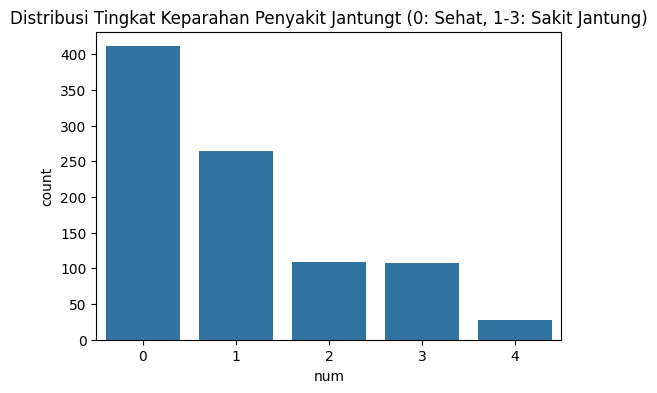

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)
plt.title('Distribusi Tingkat Keparahan Penyakit Jantungt (0: Sehat, 1-3: Sakit Jantung)')
plt.show()

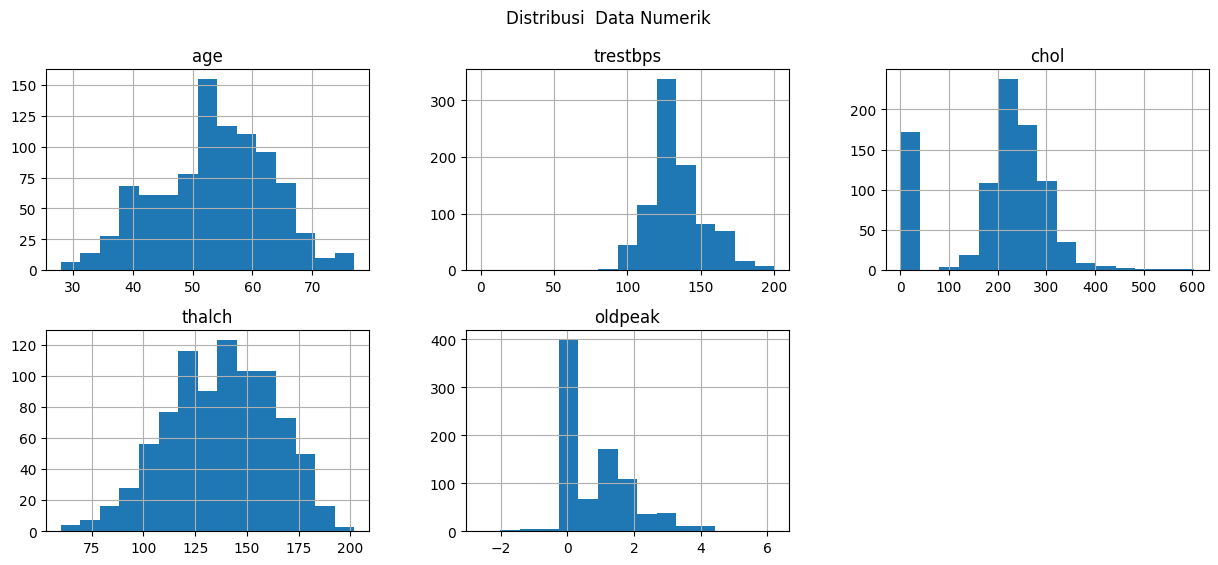

In [ ]:
num = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[num].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribusi  Data Numerik')
plt.show()


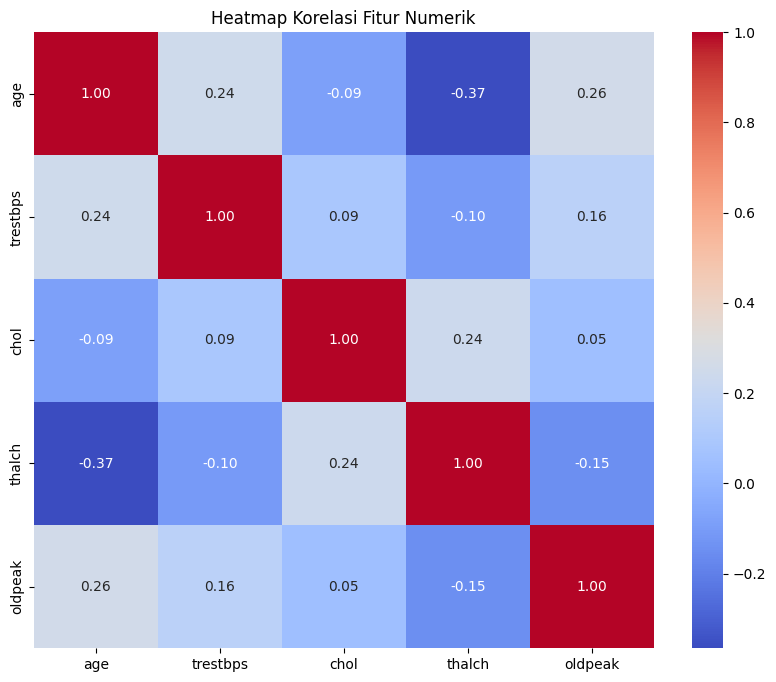

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

menghapus kolom yang tidak digunakan

In [ ]:
df.drop(['id', 'dataset'], axis=1, inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Menangani Missing Value**
Karena data kesehatan sangat krusial maka, dilakukan drop data nul

In [ ]:
df_clean = df.dropna()
print(f"Jumlah data setelah drop: {len(df_clean)} dari {len(df)}")

Jumlah data setelah drop: 299 dari 920


melakukan bining data untuk mengelompokan sehat dan sakit jantung

In [ ]:
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)

/tmp/ipython-input-3631038770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
X = df_clean.drop(['num', 'target'], axis=1)
y = df_clean['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nUkuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)


Ukuran data latih (X_train): (239, 13)
Ukuran data uji (X_test): (60, 13)


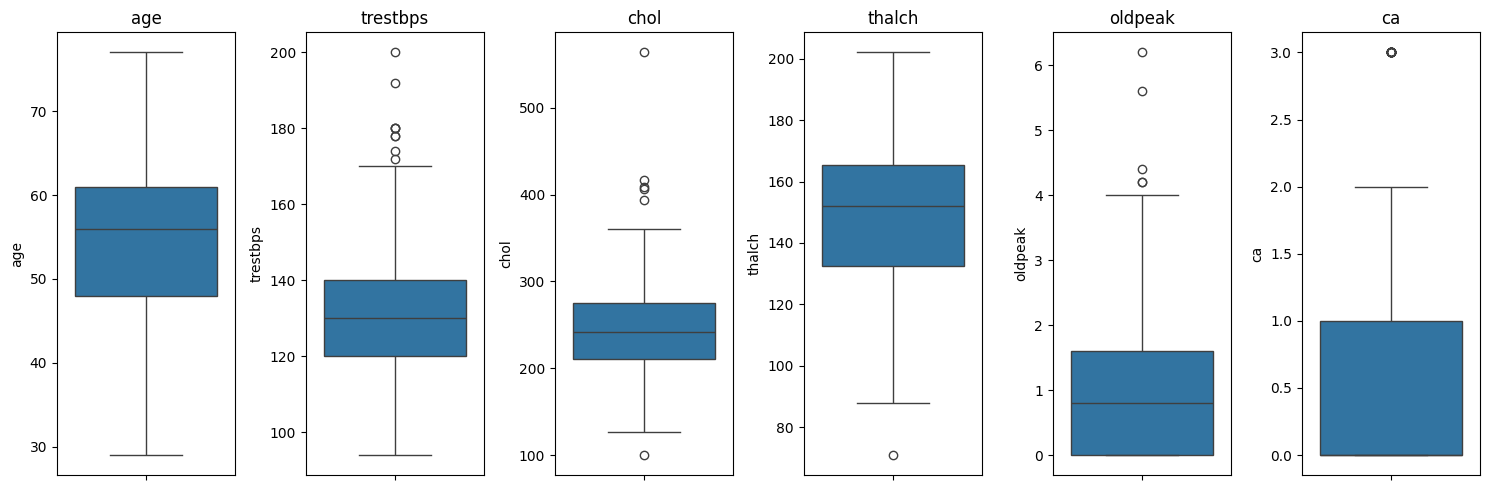

In [ ]:
numeric_features = X.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

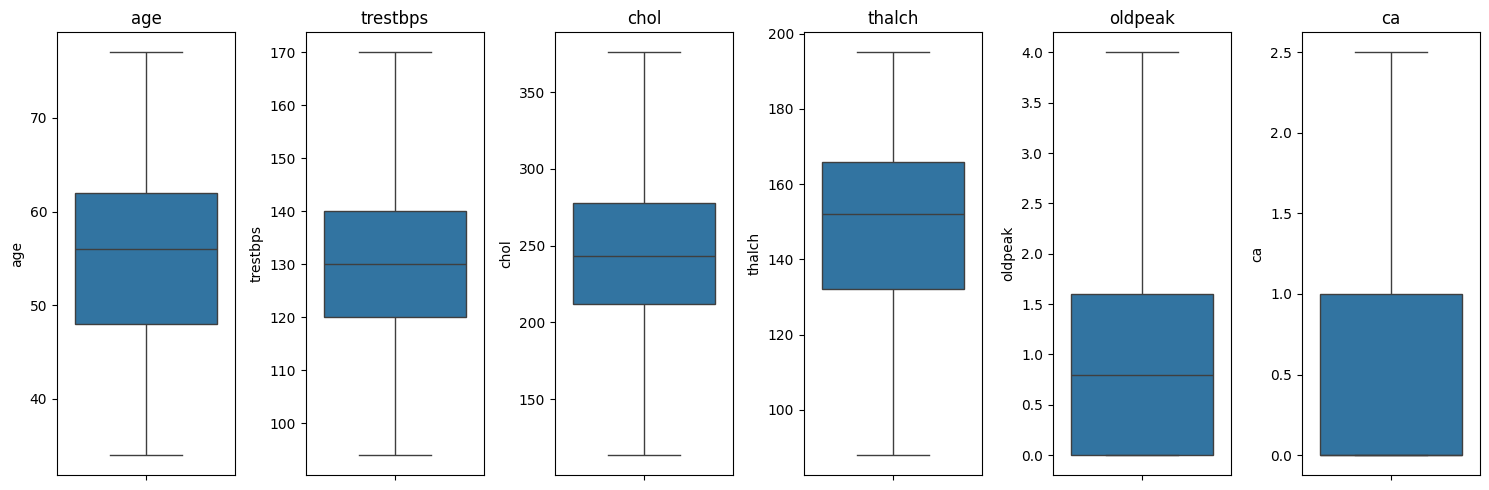

In [ ]:
def handle_outliers(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out[col] = df_out[col].clip(lower=lower_bound, upper=upper_bound)
    return df_out

X_train = handle_outliers(X_train, numeric_features)

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(y=X_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42)
)

In [ ]:
print("\nDistribusi kelas pada data latih (sebelum SMOTE):")
print(y_train.value_counts())


Distribusi kelas pada data latih (sebelum SMOTE):
target
0    128
1    111
Name: count, dtype: int64



Distribusi kelas pada data latih (setelah SMOTE):
target
1    128
0    128
Name: count, dtype: int64


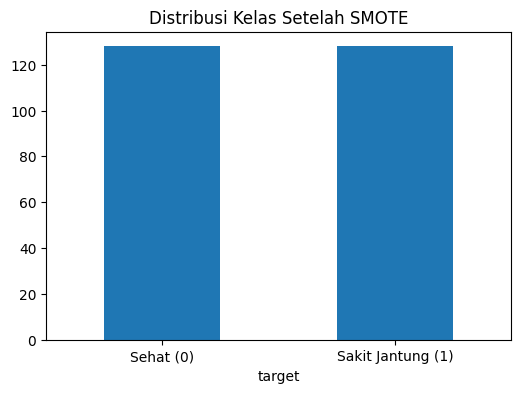

In [ ]:
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

print("\nDistribusi kelas pada data latih (setelah SMOTE):")
print(pd.Series(y_train_resampled).value_counts())
plt.figure(figsize=(6, 4))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Distribusi Kelas Setelah SMOTE')
plt.xticks([0, 1], ['Sehat (0)', 'Sakit Jantung (1)'], rotation=0)
plt.show()

In [ ]:
X_test_processed = pipeline.named_steps['columntransformer'].transform(X_test)
print(f"\nBentuk data train setelah diproses dan di-resample: {X_train_resampled.shape}")
print(f"Bentuk data val setelah diproses: {X_test_processed.shape}")


Bentuk data train setelah diproses dan di-resample: (256, 25)
Bentuk data val setelah diproses: (60, 25)


In [ ]:
output_dir = 'heart_disease_preprocessing'
os.makedirs(output_dir, exist_ok=True)

encoded_cat_features = pipeline.named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_features) + list(encoded_cat_features)

X_train_df = pd.DataFrame(X_train_resampled, columns=all_feature_names)
y_train_df = pd.DataFrame(y_train_resampled, columns=['target'])
train_processed_df = pd.concat([X_train_df, y_train_df], axis=1)
train_processed_df.to_csv(os.path.join(output_dir, 'train_processed.csv'), index=False)

X_test_df = pd.DataFrame(X_test_processed, columns=all_feature_names)
y_test_df = pd.DataFrame(y_test.values, columns=['target'])
test_processed_df = pd.concat([X_test_df, y_test_df], axis=1)
test_processed_df.to_csv(os.path.join(output_dir, 'test_processed.csv'), index=False)

print(f"\nData latih dan uji yang telah diproses disimpan di folder '{output_dir}'.")



Data latih dan uji yang telah diproses disimpan di folder 'heart_disease_preprocessing'.
